In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from matplotlib import pyplot as plt
from matplotlib.animation import PillowWriter
import nbimporter
from PDE_Classes import *
from PINN_Pre_Train_Classes import *
# from keras import callbacks
import time
# import itertools as product
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# Set data type
DTYPE = 'float64'
tf.keras.backend.set_floatx(DTYPE)

In [17]:
# Initialize order parameter for FD approximation of pde
# 1st order is better for pre-training since FD on subdomain can be modified by known u_0 and u_n+1
order = 1

N = 2**10 # number of internal collocation points
N_b = 2**6 # number of boundary and interface points

# Set number of FD points and initialize the step size
n_FD = int(N/2)

# Initialize list of points which lie on the system boundary
BC = [0, 1]

# Declare constant hyperparameters
alpha = 0.2
numEpochs = 2**6
batch_size = 2**6
learn_rate = 1e-3#tf.keras.optimizers.schedules.PiecewiseConstantDecay([2**6],[5e-2,1e-3])

# Set the number of subdomains and the desired percentage overlap
n_subdomains = 3
percent_overlap = 0.1

# Calculate the size of subdomains and overlap to achieve the parameters defined above 
domain_size =  1 / ( n_subdomains*(1 - percent_overlap) + percent_overlap )
overlap = percent_overlap*domain_size

# Construct subdomain set
sub = ()
for i in range(n_subdomains):
    step = i*(domain_size - overlap)
    sub += ([step, step+domain_size],)

# Truncate subdomain boundaries to 8 decimal precision   
sub = np.round(sub, 8)

# number of snapshots per subdomain used to aid training 
# and a space to store the FD model which produces the snapshots on a given subdomain (must be updated with changing boundary data)
snap=[2**6, None]

# Choose type of boundary condition enforcement (strong (1) or weak (0))
strong = 0

# Set subdomains for FOM modeling, if any
sub_FOM = np.zeros((n_subdomains,))
#sub_FOM[0] = 1




Training Cycle 1

Model 1: 
	Residual loss = 4.80478547e-07
	Boundary loss = 2.34327518e-07
	Snapshot loss = 6.98142775e-07
	Total loss = 1.41294884e-06
Model 2: 
	Residual loss = 1.06989075e-04
	Boundary loss = 4.74828831e-06
	Snapshot loss = 1.05971558e-05
	Total loss = 1.22334519e-04
Model 3: 
	Residual loss = 3.49662391e-04
	Boundary loss = 3.21338845e-02
	Snapshot loss = 9.63943647e-02
	Total loss = 1.28877912e-01

Pe = 40; Reference Error = 1.55303275e-01 

Model 1: 
	Residual loss = 3.28208547e-10
	Boundary loss = 1.07051534e-07
	Snapshot loss = 3.79266290e-07
	Total loss = 4.86646033e-07
Model 2: 
	Residual loss = 9.30162105e-08
	Boundary loss = 2.26275932e-06
	Snapshot loss = 5.25805074e-06
	Total loss = 7.61382627e-06
Model 3: 
	Residual loss = 1.92250568e-04
	Boundary loss = 4.11637414e-02
	Snapshot loss = 1.18009395e-01
	Total loss = 1.59365387e-01

Pe = 100; Reference Error = 1.64275541e-01 

Model 1: 
	Residual loss = 2.13248076e-09
	Boundary loss = 2.18066184e-07
	Snaps

Model 2: 
	Residual loss = 1.67629882e-07
	Boundary loss = 2.54034951e-07
	Snapshot loss = 2.50639700e-06
	Total loss = 2.92806183e-06
Model 3: 
	Residual loss = 4.49148699e-06
	Boundary loss = 9.49755895e-05
	Snapshot loss = 2.39865509e-03
	Total loss = 2.49812217e-03

Pe = 60; Reference Error = 3.06601465e-02 

Model 1: 
	Residual loss = 7.60878456e-10
	Boundary loss = 1.28167572e-07
	Snapshot loss = 8.55456500e-07
	Total loss = 9.84384951e-07
Model 2: 
	Residual loss = 1.55145583e-07
	Boundary loss = 2.56467194e-07
	Snapshot loss = 2.34244226e-06
	Total loss = 2.75405504e-06
Model 3: 
	Residual loss = 1.31253385e-06
	Boundary loss = 2.45298625e-05
	Snapshot loss = 2.66987514e-04
	Total loss = 2.92829910e-04

Pe = 30; Reference Error = 1.11642422e-02 


Training Cycle 3

Model 1: 
	Residual loss = 3.55819018e-09
	Boundary loss = 3.75779738e-07
	Snapshot loss = 1.70999389e-06
	Total loss = 2.08933182e-06
Model 2: 
	Residual loss = 1.01947567e-06
	Boundary loss = 1.18982566e-05
	Snapsh

Model 3: 
	Residual loss = 5.62834938e-08
	Boundary loss = 1.06874615e-05
	Snapshot loss = 5.68073775e-04
	Total loss = 5.78817520e-04

Pe = 20; Reference Error = 1.56244202e-02 

Model 1: 
	Residual loss = 1.36918752e-10
	Boundary loss = 2.43586705e-08
	Snapshot loss = 3.70742211e-07
	Total loss = 3.95237800e-07
Model 2: 
	Residual loss = 1.40786846e-07
	Boundary loss = 2.14786588e-07
	Snapshot loss = 2.56709045e-06
	Total loss = 2.92266388e-06
Model 3: 
	Residual loss = 1.23633328e-06
	Boundary loss = 4.10196000e-05
	Snapshot loss = 1.14193509e-03
	Total loss = 1.18419102e-03

Pe = 70; Reference Error = 2.43980169e-02 

Model 1: 
	Residual loss = 2.14160704e-10
	Boundary loss = 6.32160477e-08
	Snapshot loss = 6.56533274e-07
	Total loss = 7.19963483e-07
Model 2: 
	Residual loss = 1.47399654e-07
	Boundary loss = 1.75668393e-07
	Snapshot loss = 2.35664279e-06
	Total loss = 2.67971084e-06
Model 3: 
	Residual loss = 1.97139501e-07
	Boundary loss = 1.16994104e-06
	Snapshot loss = 9.2610572

Model 1: 
	Residual loss = 9.46432377e-10
	Boundary loss = 4.45265504e-08
	Snapshot loss = 5.25971515e-07
	Total loss = 5.71444498e-07
Model 2: 
	Residual loss = 1.50019756e-07
	Boundary loss = 1.03403018e-07
	Snapshot loss = 2.56183074e-06
	Total loss = 2.81525351e-06
Model 3: 
	Residual loss = 1.05117886e-07
	Boundary loss = 1.87220522e-06
	Snapshot loss = 1.18483334e-04
	Total loss = 1.20460657e-04

Pe = 50; Reference Error = 1.13518578e-02 

Model 1: 
	Residual loss = 1.09673332e-09
	Boundary loss = 9.83448221e-08
	Snapshot loss = 8.61384414e-07
	Total loss = 9.60825969e-07
Model 2: 
	Residual loss = 1.33763657e-07
	Boundary loss = 1.94346883e-07
	Snapshot loss = 2.48279308e-06
	Total loss = 2.81090362e-06
Model 3: 
	Residual loss = 2.80812472e-07
	Boundary loss = 8.48557721e-06
	Snapshot loss = 2.50836915e-04
	Total loss = 2.59603305e-04

Pe = 30; Reference Error = 1.13070904e-02 

Model 1: 
	Residual loss = 9.35238010e-10
	Boundary loss = 6.18204249e-08
	Snapshot loss = 6.5792679

Model 2: 
	Residual loss = 7.15110537e-08
	Boundary loss = 1.17530913e-07
	Snapshot loss = 2.96789019e-06
	Total loss = 3.15693216e-06
Model 3: 
	Residual loss = 2.19961913e-05
	Boundary loss = 4.03686363e-04
	Snapshot loss = 8.60222667e-03
	Total loss = 9.02790923e-03

Pe = 100; Reference Error = 5.21222279e-02 

Model 1: 
	Residual loss = 5.38385520e-10
	Boundary loss = 6.77550630e-08
	Snapshot loss = 6.53598531e-07
	Total loss = 7.21891979e-07
Model 2: 
	Residual loss = 8.76989496e-08
	Boundary loss = 2.56498005e-07
	Snapshot loss = 2.29725793e-06
	Total loss = 2.64145488e-06
Model 3: 
	Residual loss = 3.14360597e-06
	Boundary loss = 1.12941647e-04
	Snapshot loss = 1.79562946e-03
	Total loss = 1.91171471e-03

Pe = 40; Reference Error = 2.56101326e-02 

Model 1: 
	Residual loss = 4.94914938e-10
	Boundary loss = 1.19874752e-07
	Snapshot loss = 8.55293431e-07
	Total loss = 9.75663098e-07
Model 2: 
	Residual loss = 8.87284240e-08
	Boundary loss = 3.57984963e-07
	Snapshot loss = 2.315558

Model 3: 
	Residual loss = 6.23313250e-06
	Boundary loss = 3.65659604e-05
	Snapshot loss = 1.03537904e-03
	Total loss = 1.07817814e-03

Pe = 70; Reference Error = 2.32264901e-02 

Model 1: 
	Residual loss = 1.66347485e-09
	Boundary loss = 3.01162079e-08
	Snapshot loss = 4.39268078e-07
	Total loss = 4.71047761e-07
Model 2: 
	Residual loss = 6.27396898e-08
	Boundary loss = 1.23646266e-07
	Snapshot loss = 2.57832880e-06
	Total loss = 2.76471476e-06
Model 3: 
	Residual loss = 3.93572140e-06
	Boundary loss = 2.04261089e-05
	Snapshot loss = 5.27610268e-04
	Total loss = 5.51972098e-04

Pe = 60; Reference Error = 1.80959733e-02 

Model 1: 
	Residual loss = 1.51293642e-09
	Boundary loss = 1.20027988e-08
	Snapshot loss = 2.50362870e-07
	Total loss = 2.63878605e-07
Model 2: 
	Residual loss = 5.08447474e-08
	Boundary loss = 1.84502178e-07
	Snapshot loss = 2.84872335e-06
	Total loss = 3.08407028e-06
Model 3: 
	Residual loss = 8.13728236e-06
	Boundary loss = 6.99288536e-05
	Snapshot loss = 2.2958767

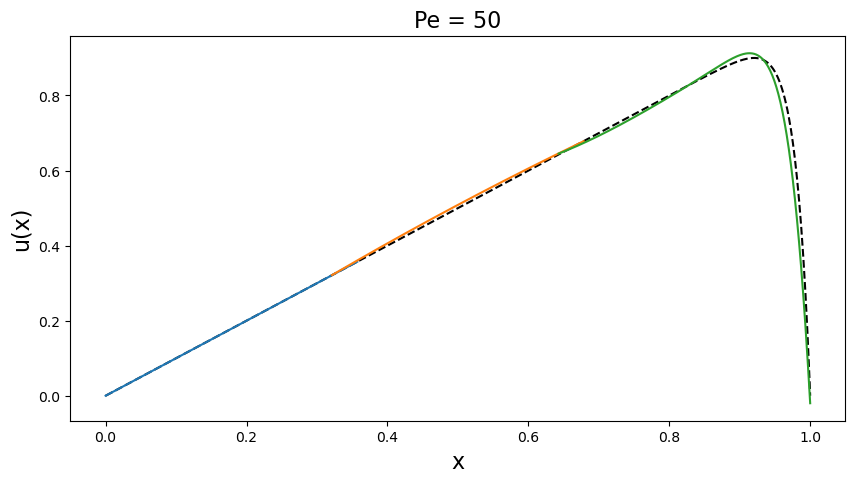

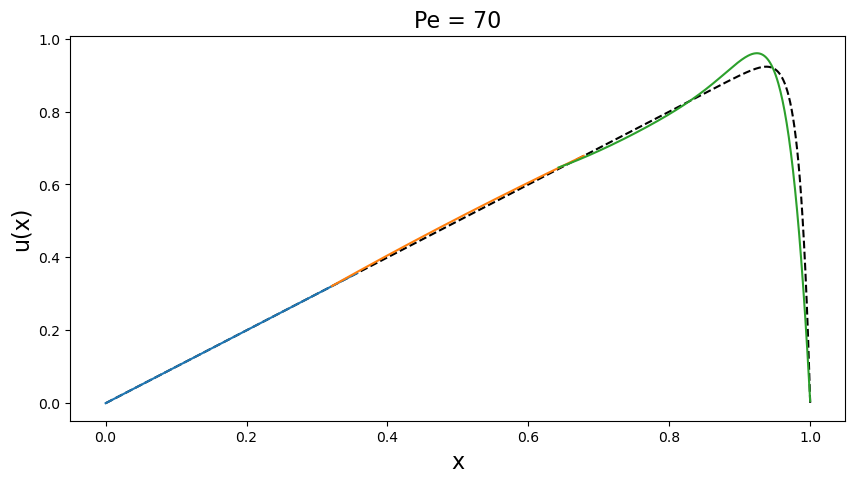

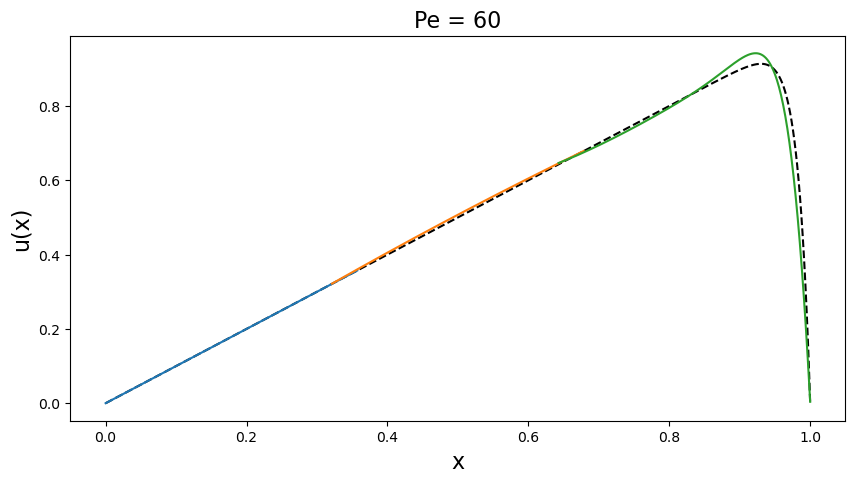

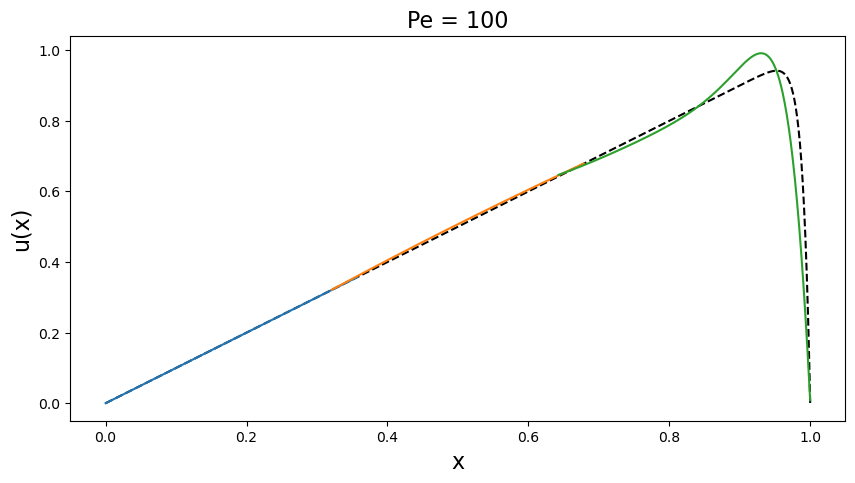

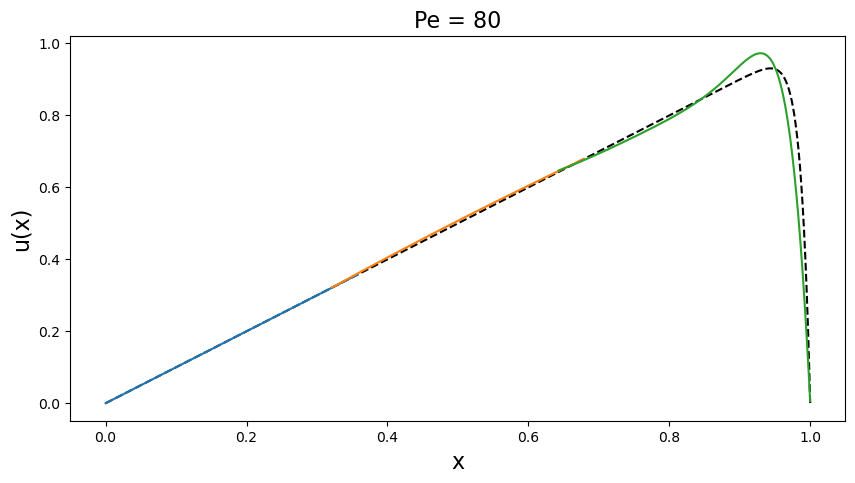

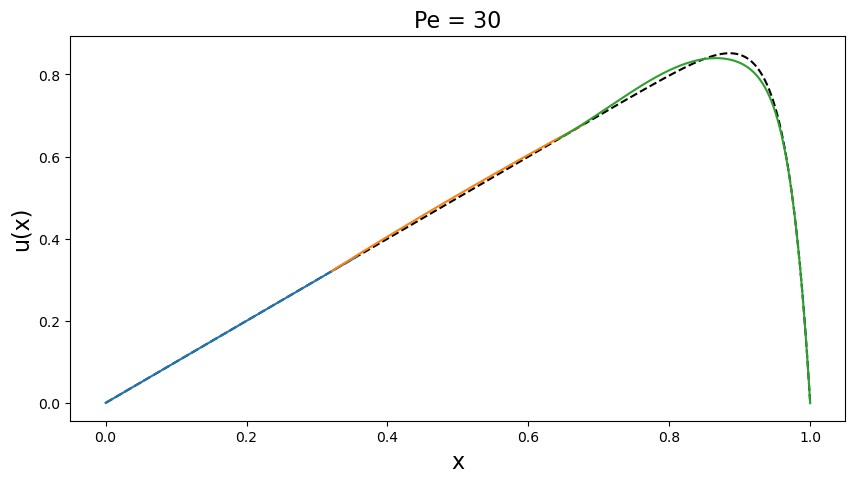

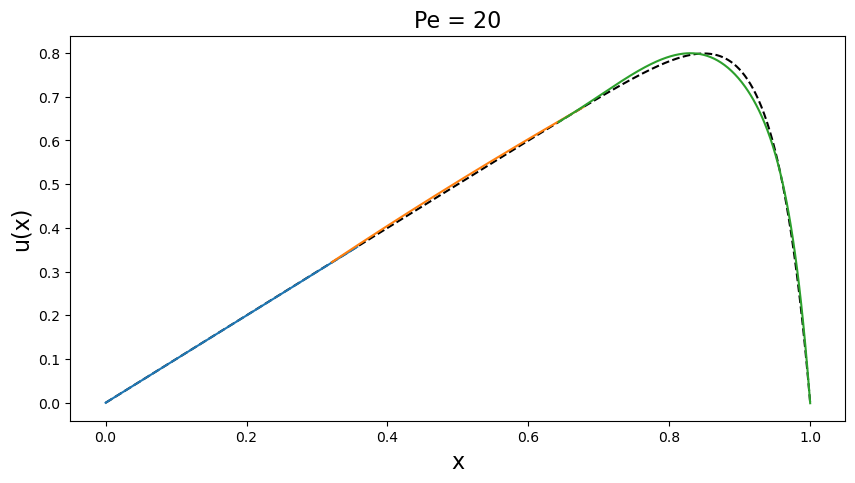

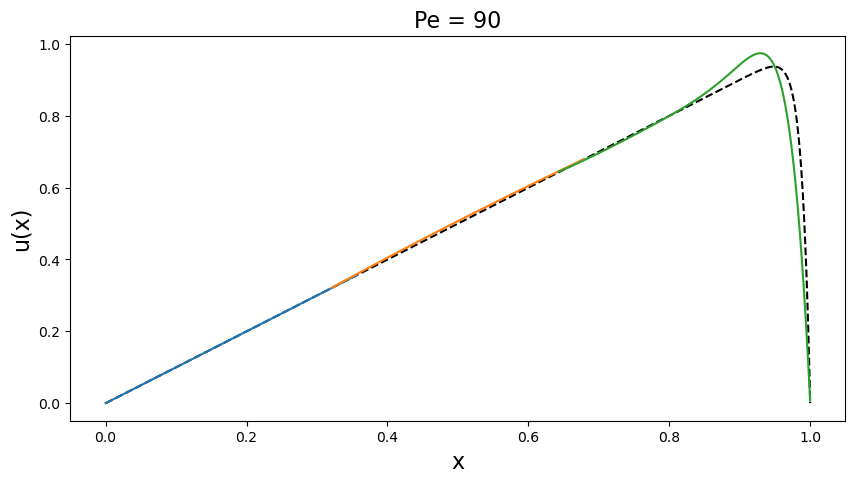

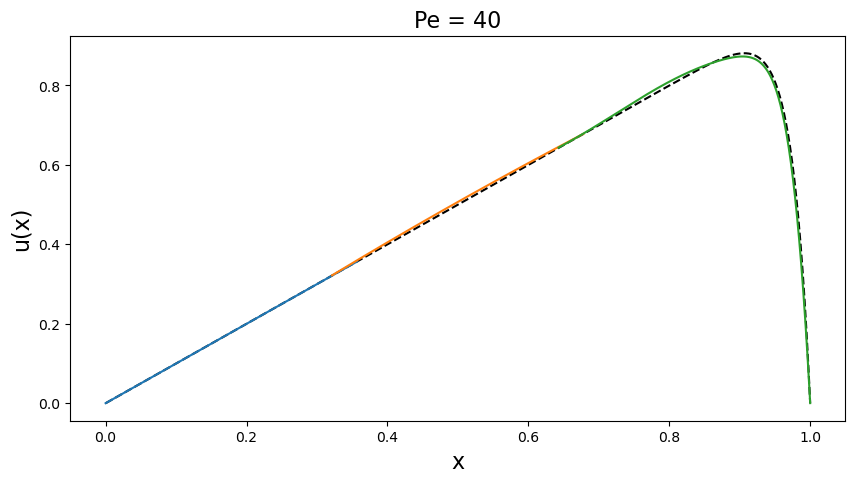

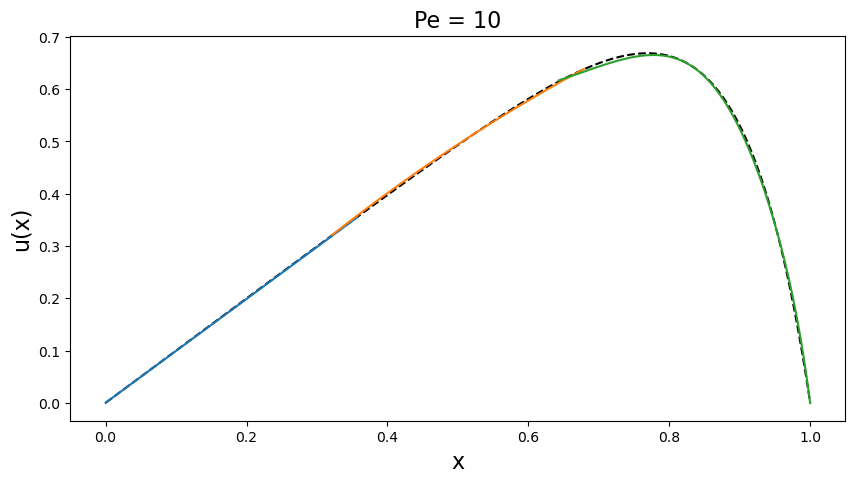

In [18]:
# Set random seed for reproducible results
tf.random.set_seed(0)

# Generate uniform internal points for the whole domain
sampler = stats.qmc.Sobol(1, scramble=False)
points = sampler.random(N)
xwidth = BC[1] - BC[0]
x = xwidth*points + BC[0]

# Initialize list of np arrays to store internal points in each subdomain
# Build and store neural networks for subdomains
X = []
model_om = ()
for i in range(len(sub)):

    # Add quasi-random points from X_r to subdomain
    temp = (x[(x >= sub[i][0]) & (x <= sub[i][1])] - sub[0][0]) / (sub[-1][1] - sub[0][0])
    temp = tf.constant(temp, shape=(len(temp), 1), dtype=DTYPE) 

    X.append( temp )

    model_om += ( PINN_Architecture(num_hidden_layers=3, num_neurons_per_layer=40), )
    model_om[i].build(input_shape=(None, 4))


# Initialize list of Peclet numbers to for training
Peclet = np.linspace(10, 100, num=10)

for iteration in range(10):
    np.random.shuffle(Peclet)
    print('\nTraining Cycle {:d}\n'.format(iteration+1))
    
    for Pe in Peclet:

        # Declare nu based on Peclet number
        nu = 1/Pe

        # Declare an instance of the PDE class 
        pde1 = PDE_1D_Steady_AdvecDiff(nu=nu, order=order)    

        # logarithmically scale Pe and normalize against maximum
        scalePe = (np.log10(Pe) - np.log10(Peclet[0])) / (np.log10(Peclet[-1]) - np.log10(Peclet[0]))

        # Obtain the boundary data for each subdomain
        g_x = np.zeros(sub.shape)
        #sigma = 0.05
        for s in range(g_x.shape[0]):

             g_x[s] = pde1.f(sub[s])
    #         mu = pde1.f(sub[s])

    #         for j in range(len(mu)):
    #             g_x[s][j] = stats.truncnorm((0 - mu[j]) / sigma, (1 - mu[j]) / sigma, loc=mu[j], scale=sigma).rvs(1)

    #         g_x[s][np.where(mu == 0)] = 0

        # Build 2-D input tensors with BC data and Peclet numbers
        X_r_om = X.copy()
        for i in range(len(sub)):
            temp = tf.constant(np.tile( np.hstack((g_x[i], scalePe)), (len(X_r_om[i]),1) ), dtype=DTYPE)
            X_r_om[i] = np.hstack( (X_r_om[i], temp) )

            X_r_om[i] = tf.constant(X_r_om[i], dtype=DTYPE)

        # Generate boundary points for each subdomain boundary
        X_b_om = []
        for i in range(len(sub)):
            X_b = []
            for j in range(len(sub[i])):
                temp = np.tile(np.hstack((sub[i][j], g_x[i], scalePe)), (N_b, 1))
                X_b.append( tf.constant( temp, shape=(N_b, temp.shape[1]), dtype=DTYPE) )
            X_b_om.append(X_b)

        # store spatial coordinates which include boundaries for plotting and error checking
        # store FD models with the randomized boundary conditions in each subdomain
        fd_om = ()
        x_schwarz = []
        for i,s in enumerate(sub):
            temp = np.linspace(s[0], s[1], num=X_r_om[i].shape[0])
            u0 = 0
            u1 = g_x[i][0]
            u_min1 = g_x[i][1]

            fd_om += ( FD_1D_Steady(temp, BC, pde1, u0=u0, u1=u1, u_min1=u_min1), )
            x_schwarz.append( tf.constant( np.column_stack( (temp, np.tile( np.hstack((g_x[i], scalePe)), (X_r_om[i].shape[0],1) )) ),
                                  shape=(X_r_om[i].shape[0], X_r_om[i].shape[1]), dtype=DTYPE) )


        # initialize tuples to contain loss for each PINN and current approximation, u, for each PINN
        u_i = ()

        # initialize error check variables to 0 as they are to be added to during sub-domain iteration
        ref_err = 0

        for s in range(len(model_om)):

            # Current model domain points
            X_r = X_r_om[s]
            # Current model boundary points
            X_b = X_b_om[s]

            # Current model
            model_r = model_om[s]
            # Current FD
            fd = fd_om[s]

            if snap[0]:
                linsnap = np.linspace(sub[s][0], sub[s][1], num=snap[0])
                u0 = 0
                u1 = g_x[s][0]
                u_min1 = g_x[s][1]

                snap[1] = FD_1D_Steady(linsnap, BC, pde1, u0=u0, u1=u1, u_min1=u_min1)

            # Initialize solver
            p = PINN_Pre_Train_g(pde1, model_r, X_r, X_b, alpha, strong, snap)

            # Solve model for current sub-domain
            p.solve(tf.keras.optimizers.Adam(learning_rate=learn_rate), numEpochs, batch_size)

            if isinstance(model_r, FD_1D_Steady):
                print('Model {:d}: '.format(s+1))
                print('\t'+'Finite Difference error = {:10.8e}'.format(p.err))

                u_i += ( model_r(x_schwarz[s][:,0]), )
            else:
                # Output loss results for each model
                print('Model {:d}: '.format(s+1))
                print('\t'+'Residual loss = {:10.8e}'.format(p.phi_r))
                if strong:
                    print('\t'+'Interface loss = {:10.8e}'.format(p.phi_i))
                    u_i += ( p.BC_enforce(x_schwarz[s])*model_r(x_schwarz[s]), )
                else:
                    print('\t'+'Boundary loss = {:10.8e}'.format(p.phi_b))
                    u_i += ( model_r(x_schwarz[s]), )
                if snap[0]:
                    print('\t'+'Snapshot loss = {:10.8e}'.format(p.phi_s))
                print('\t'+'Total loss = {:10.8e}'.format(p.loss))

                ref_err += ( tf.math.reduce_euclidean_norm(u_i[s] - tf.constant(fd.u, shape=(len(fd.u),1), dtype=DTYPE) ) /
                             tf.math.reduce_euclidean_norm( tf.constant(fd.u, shape=(len(fd.u),1), dtype=DTYPE) ) )


        # Calculate the normalized difference between u for the current iteration and u for the previous iteration
        ref_err = ref_err/len(u_i)

        # Output current Schwarz error 
        print('\nPe = {:d}; Reference Error = {:10.8e}'.format(int(Pe), ref_err), "\n")
    
        if iteration == 9:
            # Initialize variables for plotting Schwarz results
            fig = plt.figure()
            fig.tight_layout(pad=1.0)
            fig.set_size_inches(10, 5)
            x_true = tf.constant(np.linspace(BC[0], BC[1], num=N), shape=(N, 1), dtype=DTYPE)
            u_true = pde1.f(x_true)
            ax = fig.add_subplot()
            ax.plot(x_true, u_true, 'k--')
            ax.set_xlabel('x', fontsize=16)
            ax.set_ylabel('u(x)', fontsize=16)
            ax.set_title('Pe = {:d}'.format(int(Pe)), fontsize=16)

            for s in range(len(model_om)):
                ax.plot(x_schwarz[s][:,0], u_i[s])
        
    #break


Schwarz iteration 1: Convergence error = 1.09369685e+00, Reference Error = 1.62544775e-01 


Schwarz iteration 2: Convergence error = 3.90935330e-02, Reference Error = 1.33738420e-01 


Schwarz iteration 3: Convergence error = 5.96102371e-04, Reference Error = 1.33544395e-01 


Schwarz iteration 4: Convergence error = 5.09728102e-06, Reference Error = 1.33543824e-01 


Schwarz iteration 5: Convergence error = 3.56323141e-08, Reference Error = 1.33543820e-01 


Schwarz iteration 6: Convergence error = 2.53449854e-10, Reference Error = 1.33543820e-01 


Schwarz iteration 7: Convergence error = 1.80010131e-12, Reference Error = 1.33543820e-01 


Schwarz iteration 8: Convergence error = 1.24701524e-14, Reference Error = 1.33543820e-01 


Schwarz iteration 9: Convergence error = 5.87197728e-16, Reference Error = 1.33543820e-01 


Schwarz iteration 10: Convergence error = 3.63337529e-16, Reference Error = 1.33543820e-01 


Schwarz iteration 11: Convergence error = 3.31537896e-16, Reference 

KeyboardInterrupt: 

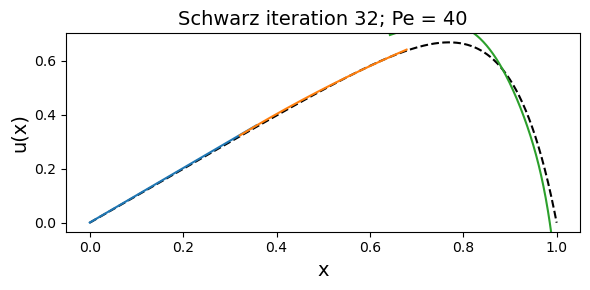

In [21]:
# Choose an unseen Peclet number to test predictive potential
Pe = 40

# Declare nu based on Peclet number
nu = 1/Pe

# Declare an instance of the PDE class 
pde1 = PDE_1D_Steady_AdvecDiff(nu=nu, order=order)    

# logarithmically scale Pe and normalize against the maximum
scalePe = (np.log10(Pe) - np.log10(Peclet[0])) / (np.log10(Peclet[-1]) - np.log10(Peclet[0]))

# Obtain the boundary data for each subdomain
g_x = np.random.rand(sub.shape[0],sub.shape[1])
g_x[0][0] = 0
g_x[-1][-1] = 0

# Initialize Schwarz loop tolerances
schwarz_tol = 1e-3
err_tol = 1e-2

# Initialize schwarz loop operators
schwarz_conv = 1
ref_err = 1
iterCount = 0
u_i_minus1 = tuple( tf.constant(np.random.rand(k.shape[0],1), shape=(k.shape[0], 1), dtype=DTYPE) for k in X_r_om )

# Initialize variables for plotting Schwarz results
fig = plt.figure(layout='tight')
#fig.tight_layout(pad=1.0)
fig.set_size_inches(6, 3)
plt.xlabel('x', fontsize=14)
plt.ylabel('u(x)', fontsize=14)
ref, = plt.plot(x_true, u_true, 'k--')
subdomain_plots = [plt.plot([], []) for _ in range(n_subdomains)]
fps = 2   
metadata = dict(title='OnlineSchwarzRecord', author='Will Snyder')
writer = PillowWriter(fps=fps, metadata=metadata)

with writer.saving(fig, "Schwarz_PreTrain_NN_SDBC_Pe_{:d}_nSub_{:d}.gif".format(int(Pe), n_subdomains), 600):
    #start = time.time()
    # Main Schwarz loop
    while (schwarz_conv > schwarz_tol or ref_err > err_tol):

        # initialize tuple to contain current approximation, u, for each PINN
        u_i = ()

        # initialize error check variables to 0 as they are to be added to during sub-domain iteration
        schwarz_conv = 0
        ref_err = 0
        
        # store spatial coordinates which include boundaries for plotting and error checking
        # store FD models with the randomized boundary conditions in each subdomain
        fd_om = []
        x_schwarz = []

        # loop over each model for training
        for s in range(len(model_om)):

            # Current model
            model_r = model_om[s]
            # Adjacent models for interface conditions
            model_i = [model_om[s-1:s], model_om[s+1:s+2]]
            # Pull boundary data for adjacent models
            g_i = [g_x[s-1:s], g_x[s+1:s+2]]
            
            for i in range(len(model_i)):
                if not model_i[i]:
                    continue
                temp = np.hstack((sub[s][i], g_i[i][0], scalePe))
                x_g = tf.constant(temp, shape = (1, len(temp)), dtype=DTYPE)
                g_x[s][i] = model_i[i][0](x_g)
            
            temp = np.linspace(sub[s][0], sub[s][1], num=X_r_om[s].shape[0])
            u0 = 0
            u1 = g_x[s][0]
            u_min1 = g_x[s][1]
            fd_om.append( FD_1D_Steady(temp, BC, pde1, u0=u0, u1=u1, u_min1=u_min1) )
            
            # Current FD
            fd = fd_om[s]
            
            # append new input tensor to storage 
            x_schwarz.append( tf.constant( np.column_stack( (temp, np.tile( np.hstack((g_x[s], scalePe)), (X_r_om[s].shape[0],1) )) ),
                          shape=(X_r_om[s].shape[0], X_r_om[s].shape[1]), dtype=DTYPE) )
            
            if isinstance(model_r, FD_1D_Steady):
                u_i += ( model_r(x_schwarz[s]), )
            else:
                if strong:
                    u_i += ( p.BC_enforce(x_schwarz[s])*model_r(x_schwarz[s]), )
                else:
                    u_i += ( model_r(x_schwarz[s]), )
                    
            schwarz_conv += tf.math.reduce_euclidean_norm(u_i[s] - u_i_minus1[s])/tf.math.reduce_euclidean_norm(u_i[s])
            ref_err += ( tf.math.reduce_euclidean_norm(u_i[s] - tf.constant(fd.u, shape=(len(fd.u),1), dtype=DTYPE) ) /
                         tf.math.reduce_euclidean_norm( tf.constant(fd.u, shape=(len(fd.u),1), dtype=DTYPE) ) )
            
            subdomain_plots[s][0].set_data(x_schwarz[s][:,0], u_i[s])

        # Calculate the normalized difference between u for the current iteration and u for the previous iteration
        schwarz_conv = schwarz_conv/len(u_i)
        ref_err = ref_err/len(u_i)

        # Update u for the previous iteration
        u_i_minus1 = u_i

        # Iterate
        iterCount += 1

        # Update title for Schwarz iter and grab frame for gif
        plt.title('Schwarz iteration {:d}; Pe = {:d}'.format(iterCount, Pe), fontsize=14)
        writer.grab_frame()
        writer.grab_frame()

        # Output current Schwarz error 
        print('\nSchwarz iteration {:d}: Convergence error = {:10.8e}, Reference Error = {:10.8e}'.format(iterCount, schwarz_conv, ref_err), "\n")
        
#         print(g_x)
#         print(x_schwarz)
        
#         break

    #end = time.time()

    for _ in range(fps*2):
        writer.grab_frame()